In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass

## Overview of the treatments

In [2]:
pd.read_csv("Conditionlist.csv")

,Unnamed: 0,Oxidant treatment,Oxidant dose (µM),Length of oxidant treatment (mins),Secondary treatment,Secondary treatment dose (µM),Length of Secondary treatment (mins),scan
0,0,CPT,0.1,4320,None,0.00,0,104781
1,1,Constitutively active AKT,0.0,0,Galactose,0.00,Long-term,41902
2,2,Constitutively active AKT,0.0,0,Galactose,0.00,Short-term,65538
3,3,Constitutively active AKT,0.0,0,None,0.00,0,37524
4,4,Constitutively active MYC,0.0,0,Galactose,0.00,Long-term,59213
5,5,Constitutively active MYC,0.0,0,Galactose,0.00,Short-term,37992
6,6,Constitutively active MYC,0.0,0,None,0.00,0,32768
7,7,Constitutively active MYC,0.0,0,None,0.00,0,39852
8,8,Diamide,500.0,15,None,0.00,0,74579
9,9,Diamide,500.0,15,None,0.00,0,56


As you can see:
- Condition 6 and 7 are the same
- Condition 8 and 9 are the same
- Condition 23 and 24 are the same

So should be combined together.

In [4]:
os.chdir("/home/robbe/ionbot/peptidoforms_per_cond")
df6_7 = pd.concat([pd.read_csv('Condition6.csv', index_col= 0), pd.read_csv('Condition7.csv', index_col = 0)])
df8_9 = pd.concat([pd.read_csv('Condition8.csv', index_col= 0), pd.read_csv('Condition9.csv', index_col = 0)])
df23_24 = pd.concat([pd.read_csv('Condition23.csv', index_col= 0), pd.read_csv('Condition24.csv', index_col = 0)])

In [5]:
os.chdir("/home/robbe/ionbot/peptidoforms_per_cond")
s0 = set(pd.read_csv('Condition0.csv')['Peptidoform_name'])
s1 = set(pd.read_csv('Condition1.csv')['Peptidoform_name'])
s2 = set(pd.read_csv('Condition2.csv')['Peptidoform_name'])
s3 = set(pd.read_csv('Condition3.csv')['Peptidoform_name'])
s4 = set(pd.read_csv('Condition4.csv')['Peptidoform_name'])
s5 = set(pd.read_csv('Condition5.csv')['Peptidoform_name'])
s6_7 = set(df6_7['Peptidoform_name'])
s8_9 = set(df8_9['Peptidoform_name'])
s10 = set(pd.read_csv('Condition10.csv')['Peptidoform_name'])
s11 = set(pd.read_csv('Condition11.csv')['Peptidoform_name'])
s12 = set(pd.read_csv('Condition12.csv')['Peptidoform_name'])
s13 = set(pd.read_csv('Condition13.csv')['Peptidoform_name'])
s14 = set(pd.read_csv('Condition14.csv')['Peptidoform_name'])
s15 = set(pd.read_csv('Condition15.csv')['Peptidoform_name'])
s16 = set(pd.read_csv('Condition16.csv')['Peptidoform_name'])
s17 = set(pd.read_csv('Condition17.csv')['Peptidoform_name'])
s18 = set(pd.read_csv('Condition18.csv')['Peptidoform_name'])
s19 = set(pd.read_csv('Condition19.csv')['Peptidoform_name'])
s20 = set(pd.read_csv('Condition20.csv')['Peptidoform_name'])
s21 = set(pd.read_csv('Condition21.csv')['Peptidoform_name'])
s22 = set(pd.read_csv('Condition22.csv')['Peptidoform_name'])
s23_24 = set(df23_24['Peptidoform_name'])
s25 = set(pd.read_csv('Condition25.csv')['Peptidoform_name'])
s26 = set(pd.read_csv('Condition26.csv')['Peptidoform_name'])
s27 = set(pd.read_csv('Condition27.csv')['Peptidoform_name'])
s28 = set(pd.read_csv('Condition28.csv')['Peptidoform_name'])
s29 = set(pd.read_csv('Condition29.csv')['Peptidoform_name'])
s30 = set(pd.read_csv('Condition30.csv')['Peptidoform_name'])
s31 = set(pd.read_csv('Condition31.csv')['Peptidoform_name'])



In [6]:
import inspect


def retrieve_name(var):
        """
        Gets the name of var. Does it from the out most frame inner-wards.
        :param var: variable to get name from.
        :return: string
        """
        for fi in reversed(inspect.stack()):
            names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
            if len(names) > 0:
                return names[0]


In [12]:
import itertools
set_list = [s0,s1,s2,s3,s4,s5,s6_7,s8_9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23_24,s25,s26,s27,s28,s29,s30,s31]

uniondict = {}
comparisonlist = []
ratiolist = []

for s, z in itertools.combinations(set_list, 2):
    name1 = retrieve_name(s).replace('s','')
    name2 = retrieve_name(z).replace('s','')
        
    comparisonlist.append("{} and {}".format(name1,name2))
    overlap = set.intersection(s,z)
    union = len(s | z)
    ratio = len(overlap) / union * 100
    ratiolist.append(ratio)
    with open("{}vs{}.txt".format(name1, name2), "w") as fp:
        for peptidoform in overlap:
            fp.write("{}\n".format(peptidoform))
    print("Ratio of common peptidoforms out of all peptidoforms between Condition {} and {}: {}".format(name1, name2, ratio))



Ratio of common peptidoforms out of all peptidoforms between Condition 0 and 1: 2.1445457615670382
Ratio of common peptidoforms out of all peptidoforms between Condition 0 and 2: 6.125803077842522
Ratio of common peptidoforms out of all peptidoforms between Condition 0 and 3: 2.1479713603818613
Ratio of common peptidoforms out of all peptidoforms between Condition 0 and 4: 5.03319438011425
Ratio of common peptidoforms out of all peptidoforms between Condition 0 and 5: 3.2724252491694354
Ratio of common peptidoforms out of all peptidoforms between Condition 0 and 6_7: 4.370102471368295
Ratio of common peptidoforms out of all peptidoforms between Condition 0 and 8_9: 6.511439014484906
Ratio of common peptidoforms out of all peptidoforms between Condition 0 and 10: 3.0761299192301084
Ratio of common peptidoforms out of all peptidoforms between Condition 0 and 11: 2.9804727646454263
Ratio of common peptidoforms out of all peptidoforms between Condition 0 and 12: 2.7366219278368487
Ratio of

In [13]:
print(len(comparisonlist))
print(len(ratiolist))

406
406


In [14]:
data = {"Comparison" : comparisonlist,
"Ratio" : ratiolist}
comparison = pd.DataFrame(data)


In [1]:
comparison

NameError: name 'comparison' is not defined

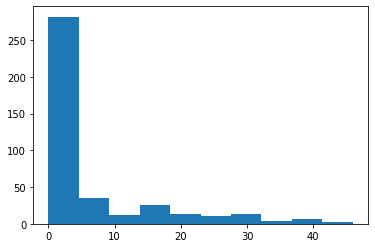

In [17]:
plt.hist(comparison["Ratio"])
plt.show()

NOW FOR MORE SETS COMPARISON

In [22]:
uniondict = {}
comparisonlist = []
ratiolist = []

for s, z, q in itertools.combinations(set_list, 3):
    name1 = retrieve_name(s).replace('s','')
    name2 = retrieve_name(z).replace('s','')
    name3 = retrieve_name(q).replace('s','')
        
    comparisonlist.append("{} and {} and {}".format(name1,name2, name3))
    overlap = set.intersection(s,z,q)
    union = len(s | z | q)
    ratio = len(overlap) / union * 100
    ratiolist.append(ratio)
    

In [23]:
data3 = {"Comparison" : comparisonlist,
"Ratio" : ratiolist}
comparison3 = pd.DataFrame(data3)

In [29]:
comparison3.sort_values("Ratio", ascending=False)

,Comparison,Ratio
2514,11 and 12 and 13,28.711898
3189,15 and 27 and 28,25.039872
2325,10 and 11 and 13,24.616772
2324,10 and 11 and 12,24.024024
2532,11 and 13 and 14,23.338150
...,...,...
2066,6_7 and 20 and 29,0.000000
3476,19 and 26 and 29,0.000000
3480,19 and 27 and 29,0.000000
3483,19 and 28 and 29,0.000000


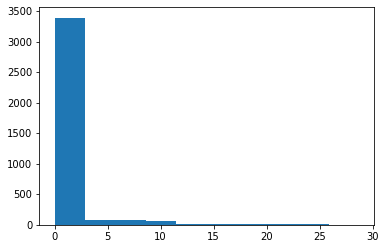

In [26]:
plt.hist(comparison3["Ratio"])
plt.show()

In [30]:
uniondict = {}
comparisonlist = []
ratiolist = []

for s, z, q, t in itertools.combinations(set_list, 4):
    name1 = retrieve_name(s).replace('s','')
    name2 = retrieve_name(z).replace('s','')
    name3 = retrieve_name(q).replace('s','')
    name4 = retrieve_name(t).replace('s', '')
        
    comparisonlist.append("{} and {} and {} and {}".format(name1,name2, name3, name4))
    overlap = set.intersection(s,z,q,t)
    union = len(s | z | q | t)
    ratio = len(overlap) / union * 100
    ratiolist.append(ratio)

In [31]:
data4 = {"Comparison" : comparisonlist,
"Ratio" : ratiolist}
comparison4 = pd.DataFrame(data4)

In [34]:
comparison4.sort_values("Ratio", ascending=False)

,Comparison,Ratio
17766,10 and 11 and 12 and 13,18.143813
18906,11 and 12 and 13 and 14,17.272104
22012,15 and 16 and 27 and 28,16.388889
17784,10 and 11 and 13 and 14,15.214564
17767,10 and 11 and 12 and 14,14.393420
...,...,...
22425,16 and 17 and 21 and 29,0.000000
11048,3 and 23_24 and 25 and 29,0.000000
9019,3 and 4 and 19 and 29,0.000000
17987,10 and 12 and 16 and 19,0.000000


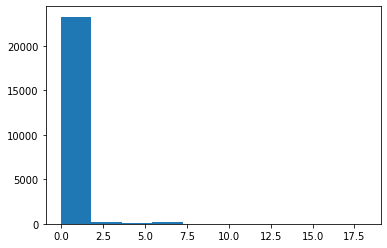

In [32]:
plt.hist(comparison4["Ratio"])
plt.show()